In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# Replace with the actual path to your dataset on OneDrive
train_data_path = "/content/drive/MyDrive/ML_1/221FA07113/train.csv"
test_data_path = "/content/drive/MyDrive/ML_1/221FA07113/test.csv"

# Load the data into pandas DataFrames
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

# Display the first few rows of the train dataset
print(train_df.head())

# Display information about the dataset (missing values, data types, etc.)
print(train_df.info())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
# Drop rows with missing target variable 'SalePrice'
train_df = train_df.dropna(subset=['SalePrice'])

# Select relevant features from the dataset (square footage, number of rooms, etc.)
features = ['GrLivArea', 'TotRmsAbvGrd', 'BsmtFinSF1', 'BsmtFinSF2', 'FullBath', 'HalfBath']
target = 'SalePrice'

# Extract features and target variable
X = train_df[features]
y = train_df[target]

# Check if there are any missing values in the selected features
print(X.isnull().sum())


GrLivArea       0
TotRmsAbvGrd    0
BsmtFinSF1      0
BsmtFinSF2      0
FullBath        0
HalfBath        0
dtype: int64


In [ ]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to confirm
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1168, 6) (292, 6) (1168,) (292,)


In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Check the scaled features (first 5 rows)
print(X_train_scaled[:5])


[[-0.40709315 -0.96456591  1.03726861 -0.28550406 -1.05556573 -0.76409752]
 [ 0.08317013  0.27075534 -0.97199573 -0.28550406  0.7736639   1.23694711]
 [-1.39525026 -1.58222654 -0.97199573 -0.28550406 -1.05556573 -0.76409752]
 [ 0.45897505  0.27075534  0.26799495 -0.28550406 -1.05556573  1.23694711]
 [ 0.31208684 -0.34690528 -0.49692021 -0.28550406  0.7736639  -0.76409752]]


In [ ]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model with the training data
model.fit(X_train_scaled, y_train)

# Print the coefficients of the model
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)


Coefficients:  [40885.86962216 -6032.00523818 19182.48145246  2245.13109908
 19748.08794165  4304.90651091]
Intercept:  181441.5419520548


In [ ]:
# Predict the target variable using the test data
y_pred = model.predict(X_test_scaled)

# Calculate the performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Root Mean Squared Error (RMSE): 51219.961593560925
R^2 Score: 0.6579696358692488


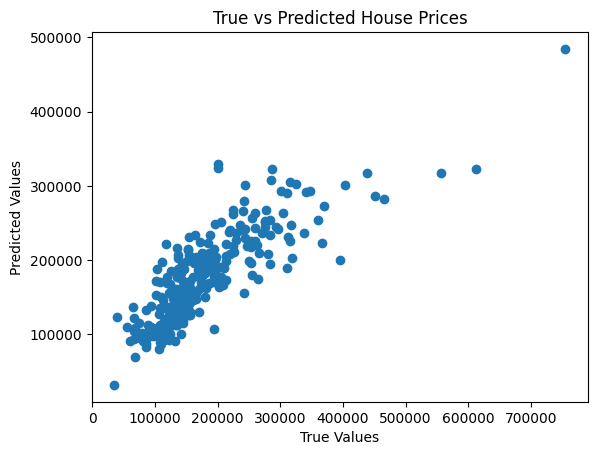

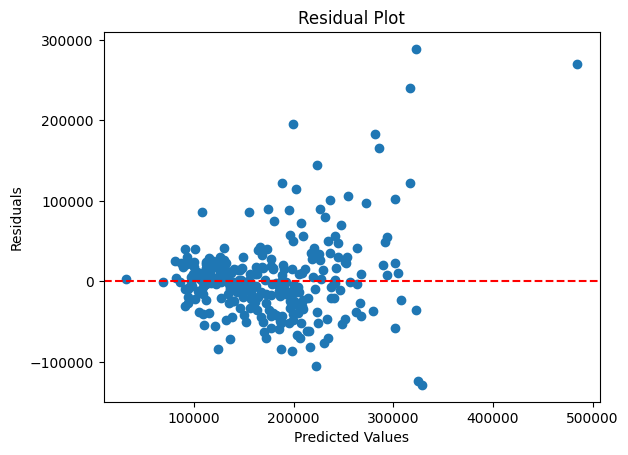

In [ ]:
# Plot: True vs Predicted House Prices
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted House Prices')
plt.show()

# Plot: Residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
